In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind

# Load the CSV file exported from SQL
data = pd.read_csv('weather_energy_data.csv', parse_dates=['ForecastDate'])

# Display first few rows
print(data.head())

# Add day type column
data['DayType'] = data['ForecastDate'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

print(data.info())

   RecordID ForecastDate       City  TemperatureHigh  TemperatureLow  \
0         1   2025-10-25  Bangalore             30.5            21.2   
1         2   2025-10-26  Bangalore             31.0            20.9   
2         3   2025-10-27  Bangalore             29.5            19.8   
3         4   2025-10-28  Bangalore             28.7            18.9   
4         5   2025-10-29  Bangalore             29.2            20.0   

   HumidityPercent  WindSpeedKmH  RainfallMM  AtmosphericPressure  \
0             68.5          12.4         2.3               1012.5   
1             70.1          15.0         1.2               1013.0   
2             72.0          10.5         5.6               1011.2   
3             73.5           9.9         7.2               1010.8   
4             74.1          13.2         3.8               1012.0   

   EnergyConsumption  
0              118.7  
1              120.0  
2              110.4  
3              105.6  
4              107.8  
<class 'pandas

C:\Users\kavana s\AppData\Local\Temp\ipykernel_16560\2543897450.py:8: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('weather_energy_data.csv', parse_dates=['ForecastDate'])


In [5]:
data = pd.read_csv('weather_energy_data.csv', parse_dates=['ForecastDate'])
data['ForecastDate'] = pd.to_datetime(data['ForecastDate'], format='%d-%m-%Y')

C:\Users\kavana s\AppData\Local\Temp\ipykernel_16560\3338978280.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('weather_energy_data.csv', parse_dates=['ForecastDate'])


In [6]:
data.to_csv('weather_energy_data.csv', index=False)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind

# Load the CSV file exported from SQL
data = pd.read_csv('weather_energy_data.csv', parse_dates=['ForecastDate'])

# Display first few rows
print(data.head())

# Add day type column
data['DayType'] = data['ForecastDate'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

print(data.info())

   RecordID ForecastDate       City  TemperatureHigh  TemperatureLow  \
0         1   2025-10-25  Bangalore             30.5            21.2   
1         2   2025-10-26  Bangalore             31.0            20.9   
2         3   2025-10-27  Bangalore             29.5            19.8   
3         4   2025-10-28  Bangalore             28.7            18.9   
4         5   2025-10-29  Bangalore             29.2            20.0   

   HumidityPercent  WindSpeedKmH  RainfallMM  AtmosphericPressure  \
0             68.5          12.4         2.3               1012.5   
1             70.1          15.0         1.2               1013.0   
2             72.0          10.5         5.6               1011.2   
3             73.5           9.9         7.2               1010.8   
4             74.1          13.2         3.8               1012.0   

   EnergyConsumption  
0              118.7  
1              120.0  
2              110.4  
3              105.6  
4              107.8  
<class 'pandas

In [8]:
print(data['EnergyConsumption'].describe())
print(f"Median: {data['EnergyConsumption'].median()}") 

count     10.000000
mean     113.820000
std        7.694847
min      102.500000
25%      108.325000
50%      112.850000
75%      119.675000
max      125.100000
Name: EnergyConsumption, dtype: float64
Median: 112.85


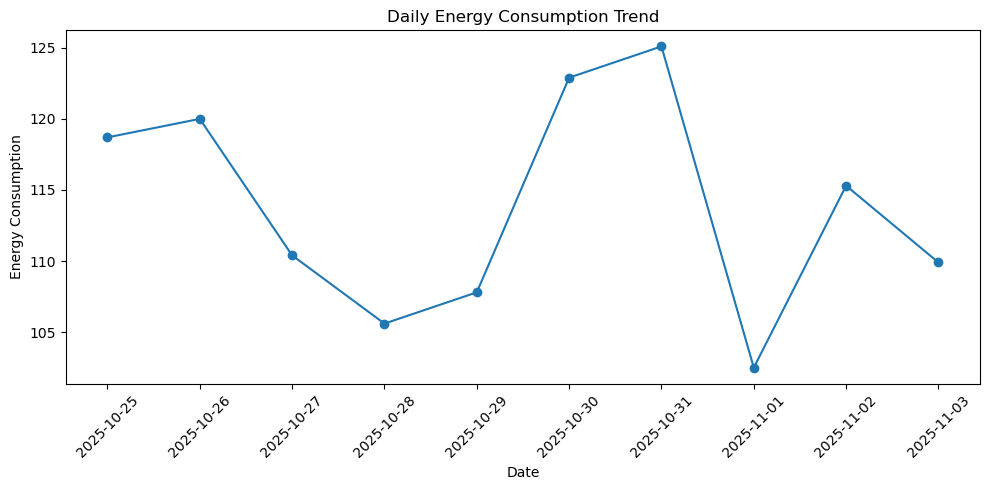

In [9]:
plt.figure(figsize=(10,5))
plt.plot(data['ForecastDate'], data['EnergyConsumption'], marker='o')
plt.title('Daily Energy Consumption Trend')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


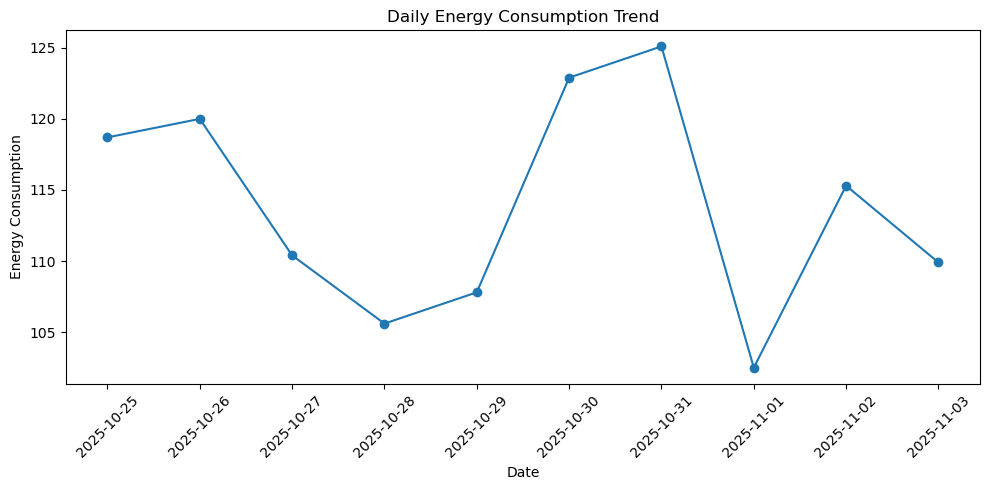

In [10]:
plt.figure(figsize=(10,5))
plt.plot(data['ForecastDate'], data['EnergyConsumption'], marker='o')
plt.title('Daily Energy Consumption Trend')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


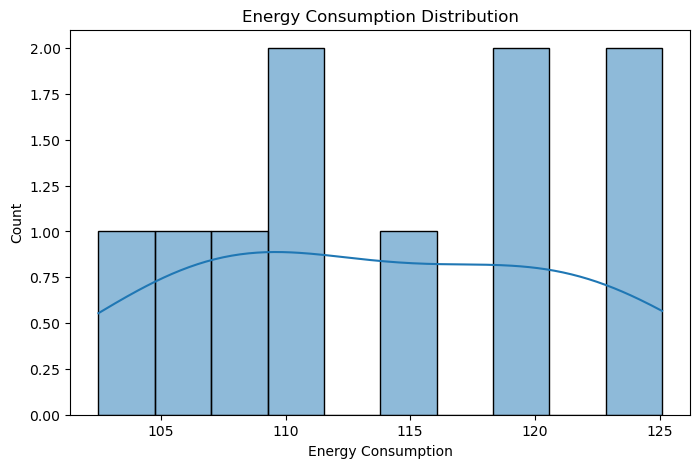

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(data['EnergyConsumption'], bins=10, kde=True)
plt.title('Energy Consumption Distribution')
plt.xlabel('Energy Consumption')
plt.show()



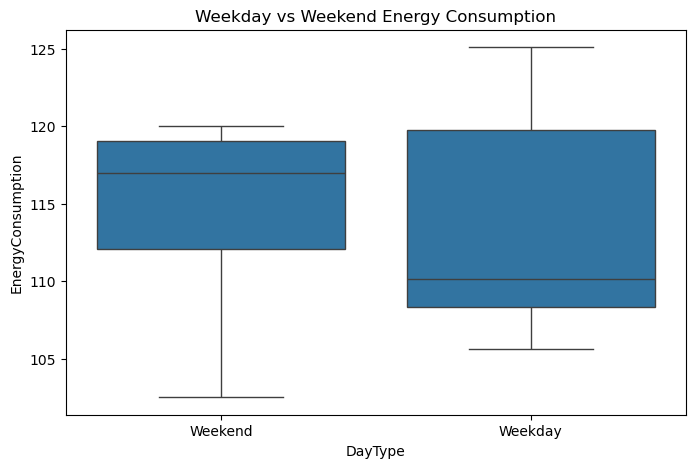

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x='DayType', y='EnergyConsumption', data=data)
plt.title('Weekday vs Weekend Energy Consumption')
plt.show()


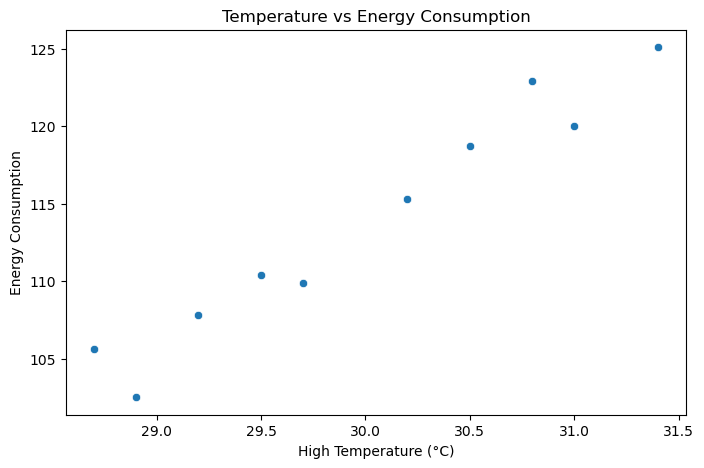

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='TemperatureHigh', y='EnergyConsumption', data=data)
plt.title('Temperature vs Energy Consumption')
plt.xlabel('High Temperature (°C)')
plt.ylabel('Energy Consumption')
plt.show()

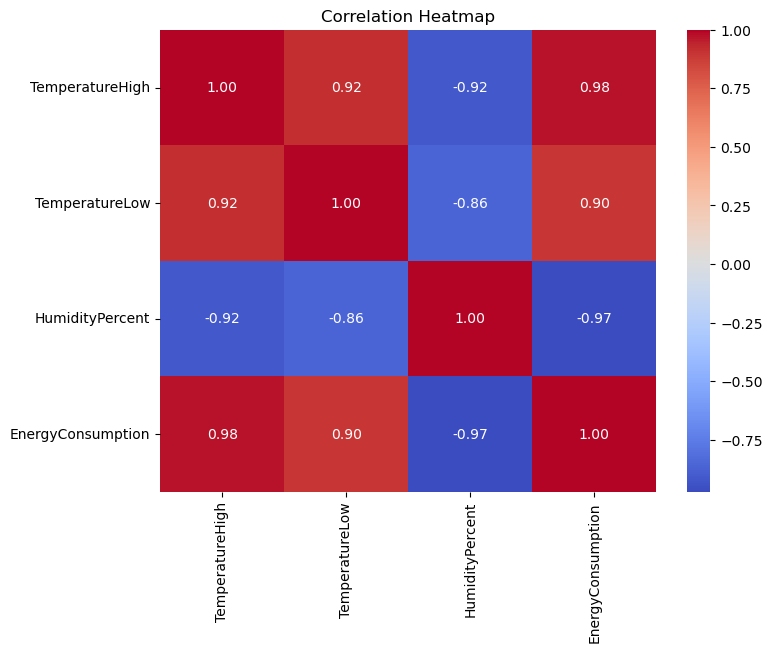

In [14]:
plt.figure(figsize=(8,6))
corr = data[['TemperatureHigh', 'TemperatureLow', 'HumidityPercent', 'EnergyConsumption']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



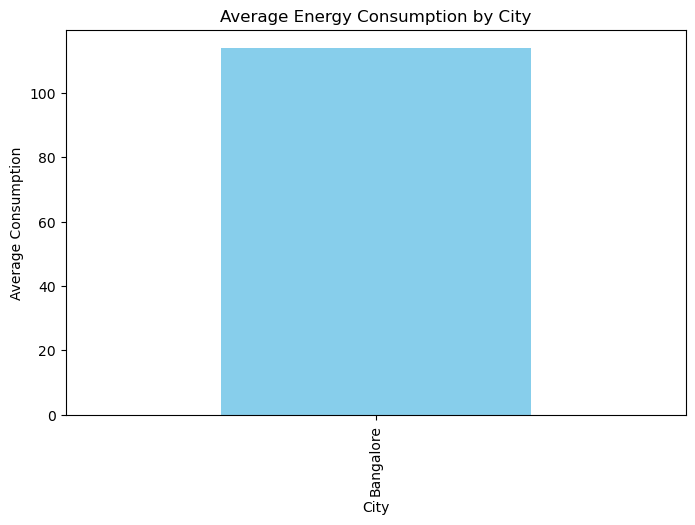

In [15]:
plt.figure(figsize=(8,5))
avg_by_city = data.groupby('City')['EnergyConsumption'].mean()
avg_by_city.plot(kind='bar', color='skyblue')
plt.title('Average Energy Consumption by City')
plt.ylabel('Average Consumption')
plt.show()

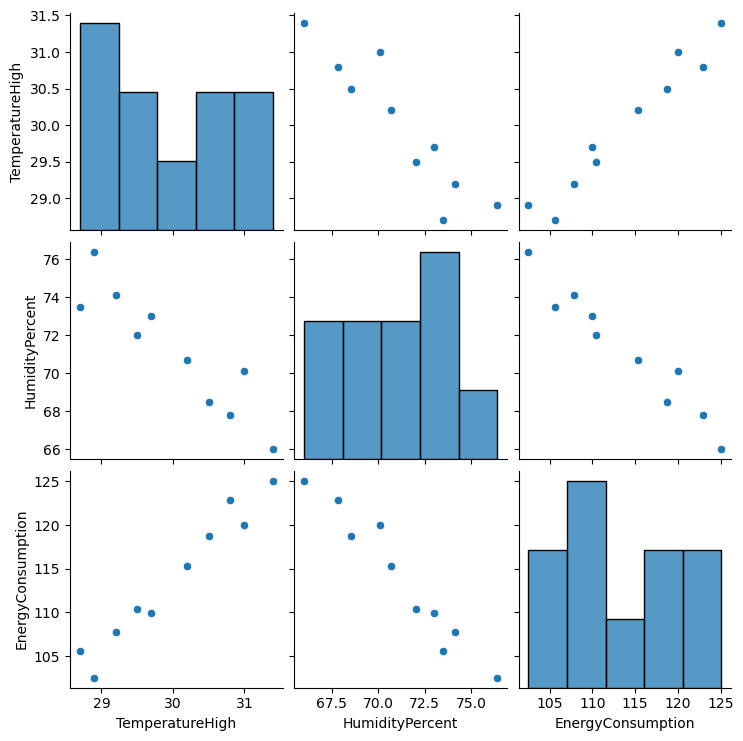

In [16]:
sns.pairplot(data[['TemperatureHigh', 'HumidityPercent', 'EnergyConsumption']])
plt.show()


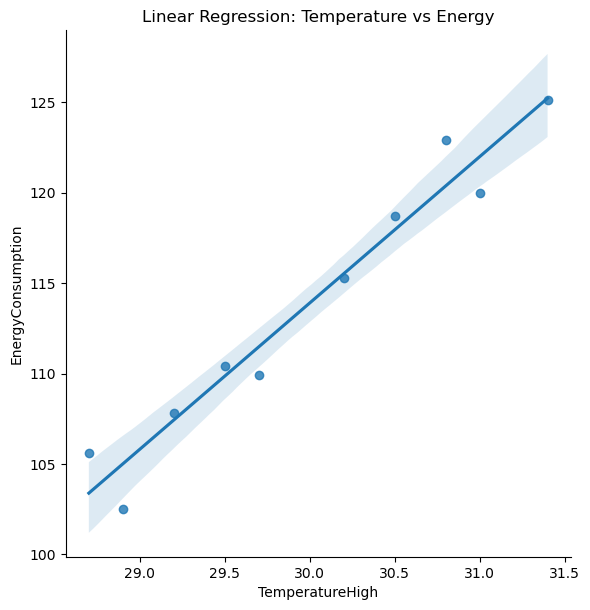

In [17]:
sns.lmplot(x='TemperatureHigh', y='EnergyConsumption', data=data, height=6)
plt.title('Linear Regression: Temperature vs Energy')
plt.show()


In [18]:
X = data[['TemperatureHigh', 'HumidityPercent']]
y = data['EnergyConsumption']

# Train model
model = LinearRegression()
model.fit(X, y)

# Results
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Add predictions
data['Predicted'] = model.predict(X)
print(data[['EnergyConsumption', 'Predicted']].head())


Coefficients: [ 4.40100886 -1.16728097]
Intercept: 64.95582228406958
   EnergyConsumption   Predicted
0              118.7  119.227846
1              120.0  119.560701
2              110.4  110.741354
3              105.6  105.469625
4              107.8  106.969761


In [19]:
weekday = data[data['DayType'] == 'Weekday']['EnergyConsumption']
weekend = data[data['DayType'] == 'Weekend']['EnergyConsumption']

t_stat, p_value = ttest_ind(weekday, weekend)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference between weekday and weekend consumption")
else:
    print("No significant difference")


T-statistic: -0.0965, P-value: 0.9255
No significant difference
